# DS 2500 HW 3

Due: Fri Feb 24 @ 11:59PM

### Submission Instructions
Please submit both of the following to the corresponding [gradescope](https://www.gradescope.com/courses/478298) assignment:
- this `.ipynb` file 
    - give a fresh `Kernel > Restart & Run All` just before uploading
- a `.py` file consistent with your `.ipynb`
    - `File > Download as ...`
    
Gradescope may run your `.py` submission to determine part of your score for this assignment.  See the [autograder instructions](https://github.com/matthigger/gradescope_auto_py/blob/main/stud_instruct.md) for details.


### Tips for success
- Start early
- Make use of [Piazza](https://course.ccs.neu.edu/ds2500/admin_piazza.html)
- Make use of [Office Hours](https://course.ccs.neu.edu/ds2500/office_hours.html)
- Remember that [Documentation / style counts for credit](https://course.ccs.neu.edu/ds2500/python_style.html)
- [No student may view or share their ungraded homework with another](https://course.ccs.neu.edu/ds2500/syllabus.html#academic-integrity-and-conduct)

# Part 1: Plotting `Shape` objects `Rectangle` and `Circle`

### Brief background: Plotting Patches in Matplotlib

The syntax below shows how to plot "patch" objects in matplotlib.  

Please modify inputs to `patches.Circle` and `patches.Rectangle` to ensure you understanding the meaning of each before proceeding.

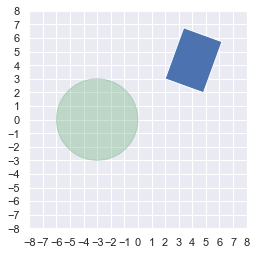

In [1]:
from hw3_helper import get_new_figure
from matplotlib import patches

# build a new figure
fig, ax = get_new_figure()

# add a circle to this figure
patch_circle = patches.Circle((-3, 0), radius=3, alpha=.3, color='g')
ax.add_patch(patch_circle)

# add a rectangle to same figure
patch_rect = patches.Rectangle((2, 3), height=4, width=3, angle=-20)
ax.add_patch(patch_rect)

## Your work here

In [2]:
# when complete, the code in this cell is all thats required to answer all subparts
# (no need to modify any of the test cases in subparts below)

# starter code:
class Shape:
    """ a plot of a shape whose position, color, and alpha can be adjusted
    
    Attributes:
        position (tuple): x-position, y-position of the shape
        color (string): color of the shape
        alpha (float): transparency of the shape
    """
    def __init__(self, pos_tuple=(0,0), color = "b", alpha=1):
        self.pos_tuple = pos_tuple
        self.color = color
        self.alpha = alpha
    
    def offset(self, x_diff = 0, y_diff = 0):
        """ changes the position of x and y of the shape
        
        Args:
            x_diff (int) = 0: default
            y_diff (int) = 0: default
        
        """
        # find new x and y
        x = self.pos_tuple[0] + x_diff
        y = self.pos_tuple[1] + y_diff
        
        # set x and y as the new pos_tuple
        new_pos_tuple = (x,y)
        self.pos_tuple = new_pos_tuple
        
        
    
class Circle(Shape):
    """ plot of Circl
    
    Attributes:
        radius (int): radius of the circle
    """
    def __init__(self, radius, pos_tuple=(0,0), color = 'k', alpha=1):
        # transfer attributes from Shape
        Shape.__init__(self, pos_tuple=pos_tuple, color = color, alpha = alpha)
        # add new attribute
        self.radius = radius
    
    def plot(self, ax):
        """ plot the shape
        """
        # add a circle to a figure
        patch_circle = patches.Circle(self.pos_tuple, radius=self.radius, 
                                      alpha=self.alpha, color=self.color)
        ax.add_patch(patch_circle)
    
    def scale(self, x):
        """ scale a shape by a constant
        """
        # scale the old radius by a constant
        self.radius = self.radius * x
        
    
class Rectangle(Shape):
    """ plot of Rectangle
    
    Attributes:
        height (int) = height of rectangle
        width (int) = width of rectangle
        angle (int) = angel of plotting the shape
    """
    def __init__(self, pos_tuple=(0,0), height=0, width=0, 
                 color="g", alpha=1, angle=0):
        # transfer attributes from Shape
        Shape.__init__(self, pos_tuple=pos_tuple, 
                       color = color, alpha = alpha)
        # add new attributes
        self.height = height
        self.width = width
        self.angle = angle
    
    def plot(self, ax):
        """ plot the shape
        """
        # add a rectangle to a figure
        patch_rect = patches.Rectangle(self.pos_tuple, height=self.height, 
                                       width=self.width, alpha = self.alpha, 
                                       angle=self.angle, color=self.color)
        ax.add_patch(patch_rect)
        
    def scale(self, x):
        """ scale a shape by a constant
        """
        # scale the old height & weight by a constant
        self.height = self.height * x
        self.width = self.width * x

# Part 1.1 (18 points)

Complete:
- `__init__()` methods for all classes above
- `plot()` methods for `Circle` and `Rectangle`

Which attributes belong in which class?
- `pos_tuple` should be a `Shape` attribute
    - `Circle` and `Rectangle` will inherit this attribute automatically
    - "Don't-Repeat-Yourself"
- `radius` should be a `Circle` attribute
    - only `Circle` objects need such a thing
- note: `angle` could be included or excluded from `Circle` for full credit 
    - why include it: `patches.Circle()` accepts an `angle` argument
    - why exclude it: it doesn't really change how a circle is plotted and simple is better

When complete, the code below should produce this image:

<img src="https://i.ibb.co/J2t5jpW/shapes0.png" width=300>


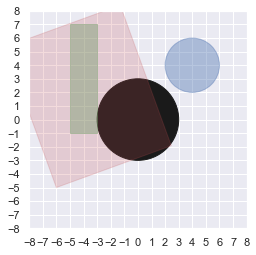

In [3]:
# define shapes
circ0 = Circle(radius=3)
circ1 = Circle(pos_tuple=(4, 4), radius=2, color='b', alpha=.4)
rect0 = Rectangle(pos_tuple=(-5, -1), height=8, width=2, color='g', alpha=.4)
rect1 = Rectangle(pos_tuple=(-6, -5), height=11, width=9, color='r', alpha=.2, angle=20)

# collect them in a tuple 
shape_tup = circ0, circ1, rect0, rect1

# build new figure and plot each shape
fig, ax = get_new_figure()
for shape in shape_tup:
    shape.plot(ax)
    

# Part 1.2 (8 points)

Implement the `offset()` behavior below.

Do we need multiple `offset()` methods with the same inputs / outputs?  Or is there somewhere we can put a single `offset()` method which gets the job done.  (Where possible: Don't-Repeat-Yourself)

When complete, the code below should produce this image:

<img src="https://i.ibb.co/VqzWNJr/shapes1.png" width=300>


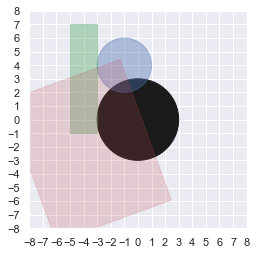

In [4]:
# (re)define shapes
circ0 = Circle(radius=3)
circ1 = Circle(pos_tuple=(4, 4), radius=2, color='b', alpha=.4)
rect0 = Rectangle(pos_tuple=(-5, -1), height=8, width=2, color='g', alpha=.4)
rect1 = Rectangle(pos_tuple=(-6, -5), height=11, width=9, color='r', alpha=.2, angle=20)

# collect them in a tuple 
shape_tup = circ0, circ1, rect0, rect1

# apply offset to the second item in shape_tup (circ1, the blue circle)
shape_tup[1].offset(x_diff=-5)

# apply offset to the last item in shape_tup (rect1, the red rectangle)
shape_tup[-1].offset(y_diff=-4)

# build new figure and plot each shape
fig, ax = get_new_figure()
for shape in shape_tup:
    shape.plot(ax)
    

# Part 1.3 (8 points)

Implement the `scale()` behavior below.

Do we need multiple `scale()` methods with the same inputs / outputs?  Or is there somewhere we can put a single `scale()` method which gets the job done.  (Where possible: Don't-Repeat-Yourself)

When complete, the code below should produce this image:

<img src="https://i.ibb.co/5xJypCp/shapes2.png" width=300>


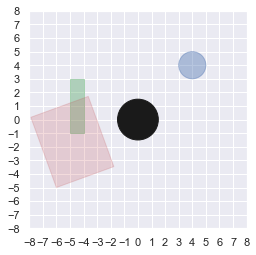

In [5]:
# (re)define shapes
circ0 = Circle(radius=3)
circ1 = Circle(pos_tuple=(4, 4), radius=2, color='b', alpha=.4)
rect0 = Rectangle(pos_tuple=(-5, -1), height=8, width=2, color='g', alpha=.4)
rect1 = Rectangle(pos_tuple=(-6, -5), height=11, width=9, color='r', alpha=.2, angle=20)

# collect them in a tuple 
shape_tup = circ0, circ1, rect0, rect1

# build new figure and plot each shape
fig, ax = get_new_figure()
for shape in shape_tup:
    # shrink object
    shape.scale(.5)
    
    # plot
    shape.plot(ax)
    

# Part 2: `IntFraction`

We build an `IntFraction` class, a fraction whose numerator and denominator are both integers.

A few suggestions / notes:
- complete the parts in the order given
    - some may depend on others and could be helpful
- be sure to study and fully digest the test cases before starting to build
- do not modify the test cases
    - you need not modify anything below "part 2.0" below

In [6]:
import math
# starter code:
class IntFraction:
    """ fraction whose numerator & denominator are both integers
    
    Attributes:
        num (int): a integer in numerator
        den (int): a integer in denominator
    """
    def __init__(self, num, den):
        
        # modify fraction so den is not negative
        # if num and den is negative, change to positive
        if num < 0 and den < 0:
            self.num = abs(num)
            self.den = abs(den)
        
        # if den is negative, change den to positive & num to negative
        elif num > 0 and den < 0:
            self.num = -(num)
            self.den = -(den)
        
        # otherwise, keep the numbers the same as input
        elif num < 0 and den > 0:
            self.num = int(num)
            self.den = int(den)
        else:
            self.num = int(num)
            self.den = int(den)
        
        # make sure denominator is positive
        assert self.den > 0; "Denominator is negative"
        
        # simplify num & den if possible
        self.simplify()
    
    def __repr__(self):
        return f'IntFraction(num={self.num}, den={self.den})'
    
    def from_int(x):
        # change whole number into fraction
        num = int(x)
        return IntFraction(num=num, den=1)
    
    def simplify(self):
        """ simplify the fraction
        """
        # find the greatest common factor/divisor
        s = math.gcd(self.num, self.den)
        
        # divide num and den by gcd to simplify the fraction
        self.num = int(self.num/s)
        self.den = int(self.den/s)
        
    def __eq__(self, other):
        """ checking to see if self and other have the same number/fraction
        """
        # check the type of number for other (intFraction or int)
        if isinstance(other, IntFraction):
            
            # if intFraction, check if num and den are the same as other's
            if int(self.num) == int(other.num) and int(self.den) == int(other.den):
                return True
            
            else:
                # conditions are not satisfied = not the same number
                return False
            
        if isinstance(other, int):
            
            # if int, divide self's intFraction to see if it is the same as other's
            if int((self.num)/(self.den)) == other:
                return True
            
            else:
                # conditions are not satisfied = not the same number
                return False
    
    def __add__(self, other):
        """ add two numbers
        """
        # check the type of number for other (intFraction or int)
        if isinstance(other, IntFraction):
            
            # if other is IntFraction, find the least common multiple
            # aka the new den
            lcm = int(math.lcm(self.den, other.den))
            
            # find the factor needed to multiple num & den
            self_nom = lcm/self.den
            other_nom = lcm/other.den
            
            # find the new nom
            num = int(self.num*self_nom) + int(other.num*other_nom)
            
            return IntFraction(num=num, den=lcm)
            
        elif isinstance(other, int):
            
            # if other is int, convert other into fraction with the same den 
            # add the nums together
            num = self.num + other*self.den
            return IntFraction(num=num, den=self.den)
        
    def __mul__(self, other):
        """ multiple two numbers
        """
        
        # check the type of number for other (intFraction or int)
        if isinstance(other, IntFraction):
            # other is IntFraction, just multiply as usual
            num = int(self.num * other.num)
            den = int(self.den * other.den)
            return IntFraction(num=num, den=den)
        
        elif isinstance(other, int):
            # other is int, just multiple it with the num
            num = int(self.num * other)
            den = int(self.den)
            return IntFraction(num=num, den=den)
        
    
    # extra credit & see __init__
    
    def __sub__(self, other):
        """ subtract one number from another (similar to add but subtract)
        """
        # check the type of number for other (intFraction or int)
        if isinstance(other, IntFraction):
            
            # if other is IntFraction, find the least common multiple
            # aka the new den
            lcm = int(math.lcm(self.den, other.den))
            
            # find the factor needed to multiple num & den
            self_nom = lcm/self.den
            other_nom = lcm/other.den
            
            # find the new nom
            num = int(self.num*self_nom) - int(other.num*other_nom)
            
            return IntFraction(num=num, den=lcm)
            
        elif isinstance(other, int):
            
            # if other is int, convert other into fraction with the same den 
            # add the nums together
            num = int(self.num - other*self.den)
            return IntFraction(num=num, den=self.den)
    
    def __truediv__(self, other):
        """ divide one number from another
        """
        # check the type of number for other (intFraction or int)
        if isinstance(other, IntFraction):
            # other is IntFraction, just multiple self by reciprocal of other IntFraction
            num = int(self.num * other.den)
            den = int(self.den * other.num)
            return IntFraction(num=num, den=den)
        
        elif isinstance(other, int):
            # other is int, just multiple self by reciprocal of the other int
            num = int(self.num)
            den = int(self.den * other)
            return IntFraction(num=num, den=den)

## Part 2.0: Documentation of `IntFraction` in all subparts (16 pts)

## Part 2.1 `IntFraction.__init__()` & `IntFraction.__repr__()` (10 auto pts)

In [7]:
one_half = IntFraction(num=1, den=2)

assert one_half.__dict__ == {'num': 1, 'den': 2}, 'attributes set properly (2 pts)'
assert str(one_half) == 'IntFraction(num=1, den=2)', '__repr__() (3 pts)'

one_half_from_float = IntFraction(num=1.0, den=2.0)
assert str(one_half_from_float) == 'IntFraction(num=1, den=2)', '(3 pts)'

assert isinstance(one_half_from_float.num, int), 'num cast to int (1 pts)'
assert isinstance(one_half_from_float.den, int), 'den cast to int (1 pts)'

## Part 2.2 `IntFraction.from_int()` (3 auto + 3 pts)

In [8]:
assert str(IntFraction.from_int(4)) == 'IntFraction(num=4, den=1)', '3 pts'

## Part 2.3 `IntFraction.simplify()` (5 auto + 5 pts)

This can be challenging to build unless you borrow the right function ([gcd()](https://docs.python.org/3/library/math.html#math.gcd) is looking promising here ...).  Don't build what you can borrow :)

In [9]:
assert str(IntFraction(num=100, den=200)) == 'IntFraction(num=1, den=2)', '2.5 pts'
assert str(IntFraction(num=2, den=8)) == 'IntFraction(num=1, den=4)', '2.5 pts'

## Part 2.4 `IntFraction.__eq__()` (6 auto pts)

In [10]:
assert IntFraction(num=1, den=2) == IntFraction(num=1, den=2), '2 pts'
assert IntFraction(num=10, den=2) == 5, '2 pts'
assert IntFraction(num=1, den=2) != 'this isnt even an IntFraction!', '2 pts'

## Part 2.5 `IntFraction.__add__()` (6 auto pts)

In [11]:
half_plus_third = IntFraction(num=1, den=2) + IntFraction(num=1, den=3)
assert half_plus_third == IntFraction(num=5, den=6), '3 pts'

half_plus_int = IntFraction(num=1, den=2) + 1
assert half_plus_int == IntFraction(num=3, den=2), '3 pts'

## Part 2.6 `IntFraction.__mul__()` (6 auto + 6 pts)
Remember, you promised not to repeat yourself when you write software (some of you did so twice! ... thanks for indulging my silly joke).  If you see some behavior here which gives a sense of deja vu, maybe we should define and use a new function.

In [12]:
half_times_third = IntFraction(num=1, den=2) * IntFraction(num=1, den=3)
assert half_times_third == IntFraction(num=1, den=6), '3 pts'

half_times_ten = IntFraction(num=1, den=2) * 10
assert half_times_ten == IntFraction(num=5, den=1), '3 pts'

## Part 2.7 (3 auto-extra-credit pts)

- (+1) Extend support for `IntFracion` to negative numbers
- (+1) `IntFraction.__sub__()`
- (+1) `IntFraction.__truediv__()`

Remember, don't repeat yourself in `__sub__()` or `__truediv__()`

In [13]:
# extra credit asserts:
# __init__ finds a consistent representation of positive & negative fractions (den never negative)
assert str(IntFraction(num=-1, den=-2)) == 'IntFraction(num=1, den=2)', '.334 pts'
assert str(IntFraction(num=-1, den=2)) == 'IntFraction(num=-1, den=2)', '.334 pts'
assert str(IntFraction(num=1, den=-2)) == 'IntFraction(num=-1, den=2)', '.334 pts'

# __sub__
assert str(IntFraction(num=1, den=2) - IntFraction(num=1, den=3)) == 'IntFraction(num=1, den=6)', '.5 pts'
assert str(IntFraction(num=1, den=2) - 3) == 'IntFraction(num=-5, den=2)', '.5 pts'


# __truediv__ 
assert str(IntFraction(num=1, den=2) / 3) == 'IntFraction(num=1, den=6)', '.5 pts'
assert str(IntFraction(num=1, den=2) / IntFraction(num=1, den=4)) == 'IntFraction(num=2, den=1)', '.5 pts'